# MAKE SOME CORRELATIONS!!

In [1]:
library(tidyverse)
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(vegan)
library(dplyr) 
library(ggpubr)
library(Hmisc)
library(corrplot)
library(ggpmisc)
library(scales)
library(broom)
library(grid)
library(png)
library(forcats)
library(gridExtra)
library(tibble)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:

In [2]:
# Set seed and your working directory
set.seed(1234) # for reproducibility of random processes
setwd("/home/strawberry/Documents/Collaborations/mangrove/analyses_R")
# Loading frequency table with taxonomic annotation 
ReadCounts_TaxAnnotation <- read.delim("./ReadCounts_TaxAnnotation_SILVA.tsv", h=T) 
head(ReadCounts_TaxAnnotation)

,ID_Sample,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species,⋯,P,Ca,Mg,K,H.Al,SB,CTC,V.,Number_Reads,AlignmentEfficiency
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,Sample-ID1-A1,AB021368,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Microbulbiferaceae,Microbulbifer,Microbulbifer elongatus,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
2,Sample-ID1-A1,AB189347,1,Bacteria,Planctomycetota,Planctomycetes,Planctomycetales,Rubinisphaeraceae,Planctomicrobium,uncultured Planctomyces sp.,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
3,Sample-ID1-A1,AB250557,1,Bacteria,Gemmatimonadota,BD2-11 terrestrial group,Incertae Sedis,Incertae Sedis,Incertae Sedis,uncultured bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
4,Sample-ID1-A1,AB294923,1,Bacteria,Gemmatimonadota,PAUC43f marine benthic group,Incertae Sedis,Incertae Sedis,Incertae Sedis,uncultured Gemmatimonadetes bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
5,Sample-ID1-A1,AB294925,1,Bacteria,Thermodesulfobacteriota,Desulfobulbia,Desulfobulbales,Desulfocapsaceae,Incertae Sedis,uncultured Desulfobulbaceae bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
6,Sample-ID1-A1,AB294930,1,Bacteria,Acidobacteriota,Subgroup 22,Incertae Sedis,Incertae Sedis,Incertae Sedis,uncultured Acidobacteria bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903


In [4]:
colnames(ReadCounts_TaxAnnotation)

[1] "ID_Sample"           "id"                  "count"              
 [4] "Kingdom"             "Phylum"              "Class"              
 [7] "Order"               "Family"              "Genus"              
[10] "Species"             "total_aligned"       "RelativeAbundance"  
[13] "ID_Sample.y"         "Mangrove"            "Collection_month"   
[16] "pH"                  "OM"                  "P"                  
[19] "Ca"                  "Mg"                  "K"                  
[22] "H.Al"                "SB"                  "CTC"                
[25] "V."                  "Number_Reads"        "AlignmentEfficiency"

In [8]:
# Create the correlation table 
correlation_table <- ReadCounts_TaxAnnotation %>%
  group_by(ID_Sample, Genus) %>%
  summarise(RelativeAbundance = sum(RelativeAbundance), .groups = "drop") %>%
  pivot_wider(names_from = Genus, values_from = RelativeAbundance) %>%
  column_to_rownames(var = "ID_Sample")

# Replace NAs with 0
correlation_table[is.na(correlation_table)] <- 0

# View first rows
head(correlation_table)

,Acidaminobacter,Actibacter,Actibacterium,Aestuariivita,Alcanivorax,Aliiroseovarius,Altererythrobacter,Altericroceibacterium,Alteromonas,Aminicenans,⋯,Microvirgula,Mobilitalea,Paenirhodobacter,Soehngenia,Stenotrophomonas,TG3,Tepidiphilus,WCHB1-32,Zag_111,livecontrolB21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sample-ID1-A1,0.18248175,0.36496350,0.3649635,0.18248175,0.09124088,0.09124088,0.18248175,0.09124088,0.09124088,0.2737226,⋯,0,0,0,0,0,0,0,0,0,0
Sample-ID2-A2,0.03462604,0.13850416,0.1038781,0.06925208,0.00000000,0.13850416,0.10387812,0.00000000,0.00000000,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
Sample-ID3-A3,0.00000000,0.21865889,0.1457726,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.72886297,0.1457726,⋯,0,0,0,0,0,0,0,0,0,0
Sample-ID4-A4,0.00000000,0.00000000,0.3250271,0.00000000,0.00000000,0.00000000,0.21668472,0.10834236,0.00000000,0.1083424,⋯,0,0,0,0,0,0,0,0,0,0
Sample-ID5-B1,0.00000000,0.16012810,0.1601281,0.00000000,0.08006405,0.00000000,0.00000000,0.00000000,0.00000000,0.1601281,⋯,0,0,0,0,0,0,0,0,0,0
Sample-ID6-B2,0.04302926,0.04302926,0.1290878,0.00000000,0.00000000,0.04302926,0.04302926,0.00000000,0.08605852,0.1290878,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
library(dplyr)
library(tidyr)

# Step 1: Build the correlation table
correlation_table <- ReadCounts_TaxAnnotation %>%
  group_by(ID_Sample, Genus) %>%
  summarise(RelativeAbundance = sum(RelativeAbundance), .groups = "drop") %>%
  pivot_wider(names_from = Genus, values_from = RelativeAbundance) %>%
  column_to_rownames(var = "ID_Sample")

# Replace NAs with 0
correlation_table[is.na(correlation_table)] <- 0

# Step 2: Get Mangrove mapping for each sample
sample_mangrove <- ReadCounts_TaxAnnotation %>%
  select(ID_Sample, Mangrove) %>%
  distinct()

# Step 3: Split samples by Mangrove
samples_araca <- sample_mangrove %>% filter(Mangrove == "Araçá") %>% pull(ID_Sample)
samples_colhereiro <- sample_mangrove %>% filter(Mangrove == "Colhereiro") %>% pull(ID_Sample)

# Step 4: Subset correlation table for each Mangrove
cor_table_araca <- correlation_table[rownames(correlation_table) %in% samples_araca, ]
cor_table_colhereiro <- correlation_table[rownames(correlation_table) %in% samples_colhereiro, ]

# Step 5: For each, calculate sum across samples for each Genus
sum_araca <- colSums(cor_table_araca)
sum_colhereiro <- colSums(cor_table_colhereiro)

# Step 6: Identify genera with sum ≥ 1%
genera_keep_araca <- names(sum_araca[sum_araca >= 1])
genera_keep_colhereiro <- names(sum_colhereiro[sum_colhereiro >= 1])

# Step 7: Subset the correlation tables to keep only selected genera
cor_table_araca_filtered <- cor_table_araca[, genera_keep_araca, drop = FALSE]
cor_table_colhereiro_filtered <- cor_table_colhereiro[, genera_keep_colhereiro, drop = FALSE]

# Step 8: View results
head(cor_table_araca_filtered)
head(cor_table_colhereiro_filtered)

,Arcobacter,Bacillus,CSP1-2,Candidatus Amoebophilus,Candidatus Nitrosoarchaeum,Coxiella,Desulfosudis,Fulvivirga,Geobacillus,Geosporobacter,⋯,Subgroup 23,Sulfurovum,Sunxiuqinia,Sva0081 sediment group,Thiogranum,Truepera,Urania-1B-19 marine sediment group,Woeseia,Priestia,Alteraurantiacibacter
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sample-ID1-A1,0.09124088,5.200730,0.3649635,1.8248175,0.3649635,0.2737226,0.6386861,0.7299270,1.00365,1.00365,⋯,1.0036496,0.7299270,0.09124088,1.2773723,0.8211679,0.2737226,0.5474453,6.660584,0.0000000,0.0000000
Sample-ID2-A2,0.20775623,1.211911,0.1385042,0.6925208,0.3808864,0.2770083,0.1038781,0.1731302,0.00000,0.00000,⋯,1.0041551,0.6232687,0.00000000,0.9695291,0.3808864,0.6578947,0.2770083,4.224377,0.8656510,0.0000000
Sample-ID3-A3,0.14577259,10.349854,0.3644315,0.5102041,1.0932945,0.7288630,0.2186589,0.5830904,0.00000,0.00000,⋯,0.9475219,0.2186589,0.51020408,1.4577259,0.0000000,0.0000000,0.0000000,2.915452,0.0728863,1.3119534
Sample-ID4-A4,2.05850488,2.275190,1.1917660,0.1083424,1.7334778,0.5417118,0.2166847,0.4333694,0.00000,0.00000,⋯,1.8418202,0.2166847,0.54171181,0.9750813,0.3250271,0.1083424,0.3250271,3.575298,1.7334778,0.4333694


,Arcobacter,Bacillus,CSP1-2,Candidatus Nitrosoarchaeum,Coxiella,Desulfosarcina,Fulvivirga,Incertae Sedis,Microbulbifer,Parahaliea,⋯,Thalassotalea,Thiogranum,Woeseia,Desulfatiglans,Draconibacterium,Priestia,Limibacillus,R76-B128,Vibrio,Maribellus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sample-ID5-B1,0.08006405,0.96076861,0.4003203,0.8006405,0.4803843,0.56044836,0.3202562,54.36349,0.4003203,0.1601281,⋯,0.16012810,0.4803843,3.522818,1.0408327,0.8807046,1.0408327,1.2009608,1.2810248,0.00000000,0.4803843
Sample-ID6-B2,5.85197935,0.08605852,0.3872633,0.3872633,0.2581756,0.04302926,0.9036145,44.10499,0.1290878,0.5593804,⋯,0.68846816,0.1721170,3.399312,0.6454389,0.7745267,0.5593804,0.6454389,0.8175559,0.90361446,0.4733219
Sample-ID7-B3,0.08354219,2.08855472,0.4177109,0.2506266,0.2506266,0.25062657,0.3341688,53.38346,1.5037594,0.5012531,⋯,0.08354219,0.4177109,3.592314,0.9189641,0.6683375,2.3391813,1.0860485,0.6683375,1.83792815,0.3341688
Sample-ID8-B4,16.59522352,11.14513166,0.6123699,0.3061849,0.2449479,0.36742192,0.4286589,47.09124,0.3674219,0.3674219,⋯,0.36742192,0.1837110,2.143295,0.9185548,0.9185548,12.0636865,1.2247397,0.6123699,0.06123699,0.2449479


In [10]:
# Prepare list with both filtered correlation tables
corr_by_mangrove <- list(
  Araca = cor_table_araca_filtered,
  Colhereiro = cor_table_colhereiro_filtered
)

# Compute Spearman correlation with P-values
cor_results <- lapply(corr_by_mangrove, function(df) {
  mat <- as.matrix(df)
  
  # rcorr computes correlations and P-values
  rcorr_res <- rcorr(mat, type = "spearman")
  
  list(
    cor = rcorr_res$r,   # correlation matrix
    p = rcorr_res$P      # p-value matrix
  )
})

# Inspect results
head(cor_results$Araca$cor)  # Correlation matrix for Araçá
head(cor_results$Araca$p)    # P-values for Araçá

head(cor_results$Colhereiro$cor)  # Correlation matrix for Colhereiro
head(cor_results$Colhereiro$p)    # P-values for Colhereiro


ERROR: Error in rcorr(mat, type = "spearman"): must have >4 observations


In [14]:
missing_cols <- setdiff(colnames(cor_table_araca_filtered), colnames(cor_table_colhereiro_filtered))

# Add missing columns with 0
for (col in missing_cols) {
  cor_table_colhereiro_filtered[[col]] <- 0
}

# Now ensure same column order
cor_table_colhereiro_filtered <- cor_table_colhereiro_filtered[, colnames(cor_table_araca_filtered)]

missing_cols2 <- setdiff(colnames(cor_table_colhereiro_filtered), colnames(cor_table_araca_filtered))

for (col in missing_cols2) {
  cor_table_araca_filtered[[col]] <- 0
}

cor_table_araca_filtered <- cor_table_araca_filtered[, colnames(cor_table_colhereiro_filtered)]

identical(colnames(cor_table_araca_filtered), colnames(cor_table_colhereiro_filtered))

combined_cor_table <- rbind(cor_table_araca_filtered, cor_table_colhereiro_filtered)

[1] TRUE

In [15]:
combined_cor_table

,Arcobacter,Bacillus,CSP1-2,Candidatus Amoebophilus,Candidatus Nitrosoarchaeum,Coxiella,Desulfosudis,Fulvivirga,Geobacillus,Geosporobacter,⋯,Subgroup 23,Sulfurovum,Sunxiuqinia,Sva0081 sediment group,Thiogranum,Truepera,Urania-1B-19 marine sediment group,Woeseia,Priestia,Alteraurantiacibacter
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sample-ID1-A1,0.09124088,5.20072993,0.3649635,1.8248175,0.3649635,0.2737226,0.6386861,0.7299270,1.00365,1.00365,⋯,1.0036496,0.7299270,0.09124088,1.2773723,0.8211679,0.2737226,0.5474453,6.660584,0.0000000,0.0000000
Sample-ID2-A2,0.20775623,1.21191136,0.1385042,0.6925208,0.3808864,0.2770083,0.1038781,0.1731302,0.00000,0.00000,⋯,1.0041551,0.6232687,0.00000000,0.9695291,0.3808864,0.6578947,0.2770083,4.224377,0.8656510,0.0000000
Sample-ID3-A3,0.14577259,10.34985423,0.3644315,0.5102041,1.0932945,0.7288630,0.2186589,0.5830904,0.00000,0.00000,⋯,0.9475219,0.2186589,0.51020408,1.4577259,0.0000000,0.0000000,0.0000000,2.915452,0.0728863,1.3119534
Sample-ID4-A4,2.05850488,2.27518960,1.1917660,0.1083424,1.7334778,0.5417118,0.2166847,0.4333694,0.00000,0.00000,⋯,1.8418202,0.2166847,0.54171181,0.9750813,0.3250271,0.1083424,0.3250271,3.575298,1.7334778,0.4333694
Sample-ID5-B1,0.08006405,0.96076861,0.4003203,0.0000000,0.8006405,0.4803843,0.0000000,0.3202562,0.00000,0.00000,⋯,2.0816653,16.9735789,0.00000000,0.9607686,0.4803843,0.0000000,0.0000000,3.522818,1.0408327,0.0000000
Sample-ID6-B2,5.85197935,0.08605852,0.3872633,0.0000000,0.3872633,0.2581756,0.0000000,0.9036145,0.00000,0.00000,⋯,2.2805508,23.1067126,0.00000000,0.7314974,0.1721170,0.0000000,0.0000000,3.399312,0.5593804,0.0000000
Sample-ID7-B3,0.08354219,2.08855472,0.4177109,0.0000000,0.2506266,0.2506266,0.0000000,0.3341688,0.00000,0.00000,⋯,1.5873016,14.8705096,0.00000000,1.7543860,0.4177109,0.0000000,0.0000000,3.592314,2.3391813,0.0000000
Sample-ID8-B4,16.59522352,11.14513166,0.6123699,0.0000000,0.3061849,0.2449479,0.0000000,0.4286589,0.00000,0.00000,⋯,1.7146356,14.7581139,0.00000000,1.4084507,0.1837110,0.0000000,0.0000000,2.143295,12.0636865,0.0000000


In [16]:
mat <- as.matrix(combined_cor_table)

rcorr_res <- rcorr(mat, type = "spearman")

cor_matrix <- rcorr_res$r
p_matrix <- rcorr_res$P

head(cor_matrix)
head(p_matrix)

,Arcobacter,Bacillus,CSP1-2,Candidatus Amoebophilus,Candidatus Nitrosoarchaeum,Coxiella,Desulfosudis,Fulvivirga,Geobacillus,Geosporobacter,⋯,Subgroup 23,Sulfurovum,Sunxiuqinia,Sva0081 sediment group,Thiogranum,Truepera,Urania-1B-19 marine sediment group,Woeseia,Priestia,Alteraurantiacibacter
Arcobacter,1.00000000,0.23809524,0.21428571,-0.1014693,0.04761905,-0.28571429,-0.1014693,0.3333333,-0.24743583,-0.24743583,⋯,0.2380952,-0.14285714,0.02727724,-0.1666667,-0.66666667,0.02727724,0.0000000,-0.47619048,0.2142857,0.09352195
Bacillus,0.23809524,1.00000000,0.16666667,0.2917241,-0.14285714,-0.02380952,0.4439280,0.1428571,0.24743583,0.24743583,⋯,-0.6190476,-0.57142857,0.46371302,0.7380952,-0.19047619,0.00000000,0.1363862,-0.26190476,0.1190476,0.40526180
CSP1-2,0.21428571,0.16666667,1.00000000,-0.6088155,-0.02380952,-0.28571429,-0.4058770,0.0000000,-0.24743583,-0.24743583,⋯,0.5476190,0.07142857,0.08183171,0.1428571,0.02380952,-0.35460407,-0.1091089,-0.28571429,0.7619048,0.03117398
Candidatus Amoebophilus,-0.10146926,0.29172412,-0.60881555,1.0000000,0.17757120,0.45661166,0.9189189,0.1141529,0.61512469,0.61512469,⋯,-0.7356521,-0.68491749,0.55217628,0.0887856,0.20293852,0.81373347,0.7846716,0.58344823,-0.6722338,0.28231569
Candidatus Nitrosoarchaeum,0.04761905,-0.14285714,-0.02380952,0.1775712,1.00000000,0.88095238,0.3551424,0.1904762,-0.24743583,-0.24743583,⋯,0.1666667,-0.42857143,0.62737643,-0.4047619,-0.35714286,0.05455447,0.1363862,-0.21428571,-0.3095238,0.73258863
Coxiella,-0.28571429,-0.02380952,-0.28571429,0.4566117,0.88095238,1.00000000,0.5834482,0.0000000,-0.08247861,-0.08247861,⋯,-0.2380952,-0.59523810,0.68193091,-0.1428571,-0.14285714,0.21821789,0.2454951,0.04761905,-0.4523810,0.76376262


,Arcobacter,Bacillus,CSP1-2,Candidatus Amoebophilus,Candidatus Nitrosoarchaeum,Coxiella,Desulfosudis,Fulvivirga,Geobacillus,Geosporobacter,⋯,Subgroup 23,Sulfurovum,Sunxiuqinia,Sva0081 sediment group,Thiogranum,Truepera,Urania-1B-19 marine sediment group,Woeseia,Priestia,Alteraurantiacibacter
Arcobacter,NA,0.5701563,0.6103444,0.8110470,0.91084917,0.49272625,0.811047018,0.4197531,0.5546464,0.5546464,⋯,0.57015632,0.73576486,0.94888055,0.69323881,0.07098765,0.94888055,1.00000000,0.2329355,0.61034442,0.82566613
Bacillus,0.5701563,NA,0.6932388,0.4832582,0.73576486,0.95537401,0.270526879,0.7357649,0.5546464,0.5546464,⋯,0.10173304,0.13895996,0.24713782,0.03655276,0.65140150,1.00000000,0.74742940,0.5309229,0.77888573,0.31923362
CSP1-2,0.6103444,0.6932388,NA,0.1091815,0.95537401,0.49272625,0.318428338,1.0000000,0.5546464,0.5546464,⋯,0.16002564,0.86652627,0.84724915,0.73576486,0.95537401,0.38875149,0.79703857,0.4927262,0.02800494,0.94158664
Candidatus Amoebophilus,0.8110470,0.4832582,0.1091815,NA,0.67398666,0.25541093,0.001252874,0.7878154,0.1045532,0.1045532,⋯,0.03750954,0.06088579,0.15586720,0.83439979,0.62980849,0.01398343,0.02110263,0.1289466,0.06780889,0.49811201
Candidatus Nitrosoarchaeum,0.9108492,0.7357649,0.9553740,0.6739867,NA,0.00385032,0.387980339,0.6514015,0.5546464,0.5546464,⋯,0.69323881,0.28940322,0.09589144,0.31988864,0.38512064,0.89791314,0.74742940,0.6103444,0.45564489,0.03873063
Coxiella,0.4927262,0.9553740,0.4927262,0.2554109,0.00385032,NA,0.128946630,1.0000000,0.8460525,0.8460525,⋯,0.57015632,0.11952981,0.06247624,0.73576486,0.73576486,0.60364506,0.55785659,0.9108492,0.26040477,0.02739604


,Bacillus,Sva0081 sediment group,SEEP-SRB1,Limibaculum,Sunxiuqinia,Alteraurantiacibacter,Candidatus Nitrosoarchaeum,Coxiella,Subgroup 10,Planococcus,⋯,Woeseia,Romboutsia,Geobacillus,Geosporobacter,Arcobacter,Fulvivirga,CSP1-2,Priestia,Subgroup 23,Sulfurovum
Bacillus,1.00000000,0.73809524,0.52380952,0.36782606,0.46371302,0.40526180,-0.14285714,-0.02380952,0.45238095,-0.04676098,⋯,-0.26190476,0.26497887,0.24743583,0.24743583,0.23809524,0.14285714,0.16666667,0.11904762,-0.61904762,-0.57142857
Sva0081 sediment group,0.73809524,1.00000000,0.33333333,0.11415292,0.24549513,0.29615285,-0.40476190,-0.14285714,0.28571429,-0.15586992,⋯,-0.04761905,0.01558699,0.08247861,0.08247861,-0.16666667,-0.04761905,0.14285714,0.23809524,-0.66666667,-0.35714286
SEEP-SRB1,0.52380952,0.33333333,1.00000000,0.44392800,0.65465367,0.54554473,0.38095238,0.52380952,0.04761905,-0.21821789,⋯,-0.14285714,0.40526180,0.41239305,0.41239305,-0.38095238,0.33333333,0.00000000,-0.38095238,-0.40476190,-0.33333333
Limibaculum,0.36782606,0.11415292,0.44392800,1.00000000,0.90091920,0.63105861,0.50734629,0.63418286,0.71028481,0.36534972,⋯,0.40587703,0.78051986,0.43937478,0.43937478,0.02536731,0.26635680,-0.12683657,-0.44392800,-0.48197897,-0.86248869
Sunxiuqinia,0.46371302,0.24549513,0.65465367,0.90091920,1.00000000,0.83928571,0.62737643,0.68193091,0.51826749,-0.05357143,⋯,0.08183171,0.67857143,0.28347335,0.28347335,0.02727724,0.43643578,0.08183171,-0.35460407,-0.38188131,-0.79103985
Alteraurantiacibacter,0.40526180,0.29615285,0.54554473,0.63105861,0.83928571,1.00000000,0.73258863,0.76376262,0.51437074,-0.32653061,⋯,-0.29615285,0.17346939,-0.21597970,-0.21597970,0.09352195,0.26497887,0.03117398,-0.18704391,-0.32732684,-0.73258863
Candidatus Nitrosoarchaeum,-0.14285714,-0.40476190,0.38095238,0.50734629,0.62737643,0.73258863,1.00000000,0.88095238,0.21428571,-0.23380488,⋯,-0.21428571,0.17145691,-0.24743583,-0.24743583,0.04761905,0.19047619,-0.02380952,-0.30952381,0.16666667,-0.42857143
Coxiella,-0.02380952,-0.14285714,0.52380952,0.63418286,0.68193091,0.76376262,0.88095238,1.00000000,0.42857143,0.01558699,⋯,0.04761905,0.20263090,-0.08247861,-0.08247861,-0.28571429,0.00000000,-0.28571429,-0.45238095,-0.23809524,-0.59523810
Subgroup 10,0.45238095,0.28571429,0.04761905,0.71028481,0.51826749,0.51437074,0.21428571,0.42857143,1.00000000,0.54554473,⋯,0.23809524,0.23380488,0.08247861,0.08247861,0.23809524,-0.09523810,-0.42857143,-0.26190476,-0.71428571,-0.88095238
Planococcus,-0.04676098,-0.15586992,-0.21821789,0.36534972,-0.05357143,-0.32653061,-0.23380488,0.01558699,0.54554473,1.00000000,⋯,0.73258863,0.31632653,0.53994925,0.53994925,-0.09352195,-0.21821789,-0.65465367,-0.45202277,-0.48319676,-0.26497887


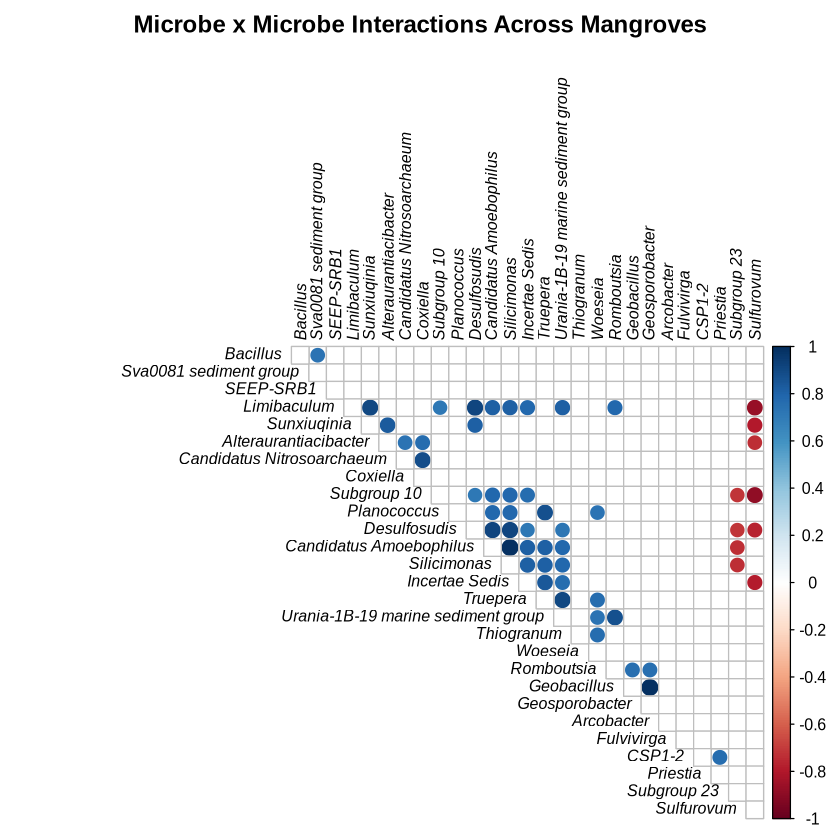

In [30]:
# Plot only significant correlations
cor_matrix[is.na(cor_matrix)] <- 0 # replace NAs with 0
p_matrix[is.na(p_matrix)] <- 1  # Set p-value as non-significant


corplot <- corrplot(
  cor_matrix,
  method = "circle",           # Use color shading for correlations
  type = "upper",             # Only upper triangle, can be "full" or "lower"
  p.mat = p_matrix,           # p-values matrix
  insig = "blank",            # Blank non-significant correlations
  sig.level = 0.05,           # Significance threshold
  tl.col = "black",           # Text label color
  order = "hclust",           # Cluster similar variables
  hclust.method = "average",  # Clustering method
  tl.cex = 0.8,               # Text size for labels
  font = 3,                   # Italic font
  mar = c(0, 0, 2, 0),        # Margins
  title = "Microbe x Microbe Interactions Across Mangroves"                # Dynamic title
)
corplot

In [34]:
## Check correlation values 
### Sort correlations by ascending p-value
sorted_corrPos <- corplot$corrPos[order(corplot$corrPos$p.value), ]

### View the first rows with lowest p-values
head(sorted_corrPos)

## keep only significant ones
signif_corrPos <- subset(sorted_corrPos, p.value < 0.05)

signif_corrPos

,xName,yName,x,y,corr,p.value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
90,Silicimonas,Candidatus Amoebophilus,13,16,1.0000000,0.000000000
230,Geosporobacter,Geobacillus,21,8,1.0000000,0.000000000
59,Desulfosudis,Limibaculum,11,24,0.9189189,0.001252874
77,Candidatus Amoebophilus,Desulfosudis,12,17,0.9189189,0.001252874
89,Silicimonas,Desulfosudis,13,17,0.9189189,0.001252874
135,Urania-1B-19 marine sediment group,Truepera,16,13,0.9062500,0.001917813


,xName,yName,x,y,corr,p.value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
90,Silicimonas,Candidatus Amoebophilus,13,16,1.0000000,0.000000000
230,Geosporobacter,Geobacillus,21,8,1.0000000,0.000000000
59,Desulfosudis,Limibaculum,11,24,0.9189189,0.001252874
77,Candidatus Amoebophilus,Desulfosudis,12,17,0.9189189,0.001252874
89,Silicimonas,Desulfosudis,13,17,0.9189189,0.001252874
135,Urania-1B-19 marine sediment group,Truepera,16,13,0.9062500,0.001917813
14,Sunxiuqinia,Limibaculum,5,24,0.9009192,0.002254572
35,Coxiella,Candidatus Nitrosoarchaeum,8,21,0.8809524,0.003850320
360,Sulfurovum,Subgroup 10,27,19,-0.8809524,0.003850320
